In [94]:
import numpy as np
import pandas as pd

from piratesim.common.assets import get_asset
import matplotlib.pyplot as plt

pirates = get_asset('pirates/pirates.csv')

trait_value_map = pd.Series(
    {
        'Tricky': 3,
        'Bold': 1,
        'Brutal': 2,
        'Cautious': 3,
        'Greedy': 1,
        'Loyal': 2,
        'Impulsive': -2,
        'Superstitious': 1,
        'Strategic': 3,
        'Cowardly': -3,
        'Resourceful': 3,
    }).rename('trait_value')
trait_value_map.index.name = 'trait'

pirates['display_name'] = pirates['name'].map(lambda x: x.split(' ', 1)[-1].strip())

pirates = pirates.join(trait_value_map, on='trait')

pirates['stats_sum'] = pirates[['navigation', 'combat', 'trickyness']].sum(axis=1)
pirates['stats_plus_trait'] = pirates['stats_sum'] + pirates['trait_value']

stat_value = pd.Series((1, 2, 3, 4, 5), index=(1, 2, 3, 4, 5))
# stat_value = stat_value.cumsum()
stat_value = (stat_value ** 1.2).round(1)
print(stat_value)

pirates['weighted_stats'] = pirates[
        ['navigation', 'combat', 'trickyness']
    ].replace(stat_value.to_dict()).sum(axis=1)

print(pirates['level'].value_counts().sort_index())
pirates.sort_values(['level', 'weighted_stats', 'stats_plus_trait'])

1    1.0
2    2.3
3    3.7
4    5.3
5    6.9
dtype: float64
level
0     4
1     8
2    11
3     3
Name: count, dtype: int64


,name,trait,navigation,combat,trickyness,description,level,display_name,trait_value,stats_sum,stats_plus_trait,weighted_stats
12,⛈️ Stormy Weather,Superstitious,4,1,2,Swears she can predict the weather—just don't ...,0,Stormy Weather,1,7,8,8.6
2,"⚔️ Lily ""The Blade""",Brutal,2,4,1,"Swings first, asks questions never.",0,"Lily ""The Blade""",2,7,9,8.6
6,💥 Barnacle Bill,Impulsive,2,3,3,"His motto: 'Act first, think later… or never.'",0,Barnacle Bill,-2,8,6,9.7
1,🧔🏽‍♂️ Redbeard,Bold,2,3,4,Once tried to wrestle a shark... and won. The ...,0,Redbeard,1,9,10,11.3
9,"🥃 Grog ""The Gutsy""",Bold,2,5,1,"Afraid of nothing, except running out of rum.",1,"Grog ""The Gutsy""",1,8,9,10.2
16,👹 Madcap Max,Impulsive,3,4,2,Has a habit of charging into battle... even if...,1,Madcap Max,-2,9,7,11.3
7,🔮 Misty Morgan,Superstitious,3,2,4,"Convinced the sea is watching her, so she watc...",1,Misty Morgan,1,9,10,11.3
21,⚡ Hiperion,Bold,3,4,2,"Claims to be descended from the gods, but can'...",1,Hiperion,1,9,10,11.3
3,👁️ One-Eyed Pete,Cautious,4,2,3,"Keeps an eye out for trouble... well, half an ...",1,One-Eyed Pete,3,9,12,11.3
19,🌬️ Windy Wendy,Cautious,4,2,3,"Always checks the winds before setting sail, j...",1,Windy Wendy,3,9,12,11.3


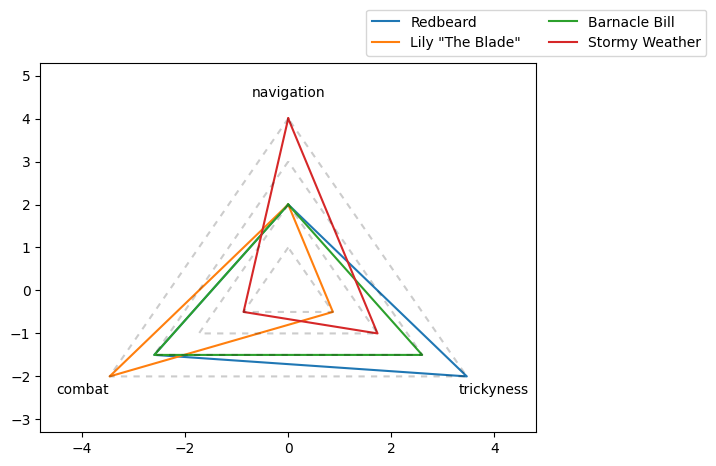

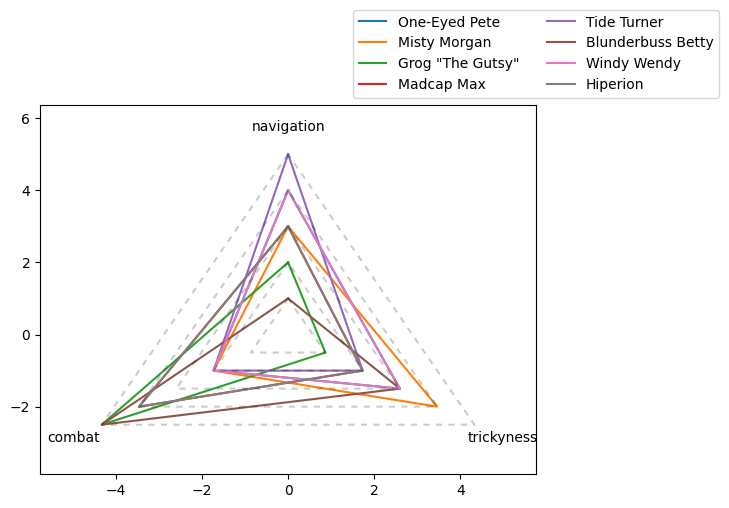

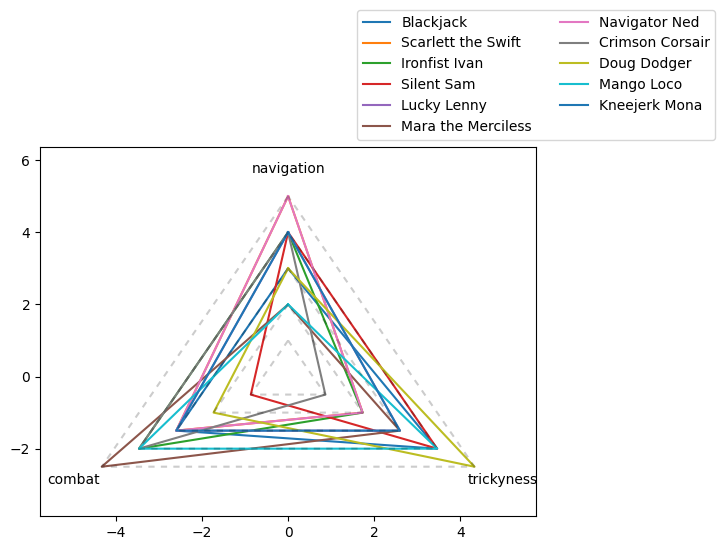

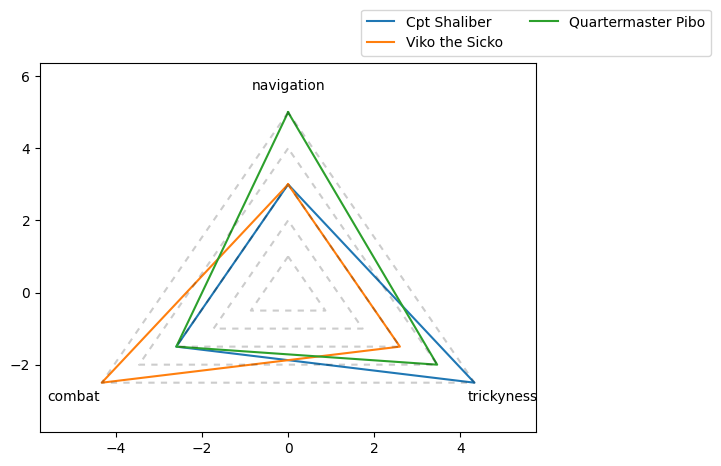

In [95]:
def radar_chart(df, columns, name_col='display_name'):
    def draw_points(xy, close=False, fill=False, *args, **kwargs):

        x = list(xy[0])
        x.append(x[0])
        x = np.array(x)

        y = list(xy[1])
        y.append(y[0])
        y = np.array(y)

        xy_closed = x, y

        return plt.plot(*(xy_closed if close else xy), *args, **kwargs)

    def polar_to_cart(r, angle_rad):
        x = r * np.cos(angle_rad)
        y = r * np.sin(angle_rad)
        return x, y
    
    def draw_regular_polygon(radius, n_points, *args, **kwargs):
        step = np.pi * 2 / n_points
        angles = np.linspace(np.pi / 2, np.pi * 2.5 - step, n_points)
        xy = polar_to_cart(radius, angles)

        draw_points(xy, close=True, *args, **kwargs)
    
    plt.figure()

    max_radius = df[columns].max(axis=None)
    n_cols = len(columns)
    
    step = np.pi * 2 / n_cols
    angles = np.linspace(np.pi / 2, np.pi * 2.5 - step, n_cols)
    
    for _, row in df.iterrows():
        radii = row[columns].values
        xy = polar_to_cart(radii, angles)
        draw_points(xy, close=True,)

    plt.legend(df[name_col].tolist(), loc=8, ncols=2, bbox_to_anchor=(1,1))

    for stat, angle in zip(columns, angles):
        xy = polar_to_cart(max_radius * 1.15, angle)
        plt.annotate(stat, xy, ha='center', va='center')
    for r in range(1, max_radius + 1):
        draw_regular_polygon(r, len(columns), color='k', alpha=0.2, dashes=(3, 3))

    xlim, ylim = plt.gca().get_xlim(), plt.gca().get_ylim()
    plt.xlim((xlim[0] - 1.0, xlim[1] + 1.0))
    plt.ylim((ylim[0] - 1.0, ylim[1] + 1.0))
    

for level in range(4):
    radar_chart(pirates[pirates['level'] == level], ['navigation', 'combat', 'trickyness'])